# **Practica 8 - Ecuaciones de Fresnel.**.
Valentina Merchán Sanchez, Sergio Alejandro Prieto, Angee Vanessa Segura.  
  Mediciones de Optica y Acustica.  
  Universidad Nacional de Colombia - 2025-1

1.Tres gráficas(una para cada tipo de luz: natural, polarización s y polarización p).

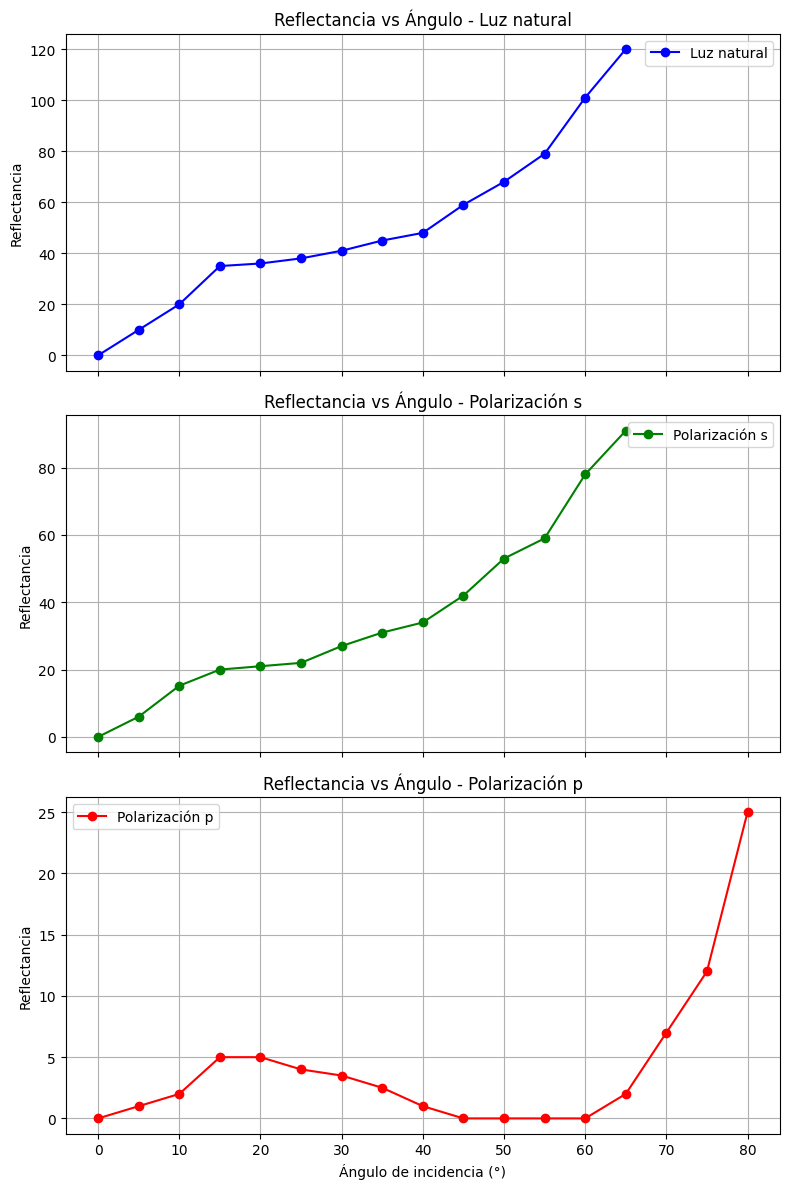

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
angulos = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
angulos2 = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65])
luz_natural = np.array([0, 10, 20, 35, 36, 38, 41, 45, 48, 59, 68, 79, 101, 120])
polarizado_s = np.array([0, 6, 15.2, 20, 21, 22, 27, 31, 34, 42, 53, 59, 78, 91])
polarizado_p = np.array([0, 1, 2, 5, 5, 4, 3.5, 2.5, 1, 0, 0, 0, 0, 2, 7, 12, 25])

# Crear figura y subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Gráfica 1: Luz natural
axs[0].plot(angulos2, luz_natural, 'b-o', label='Luz natural')
axs[0].set_ylabel('Reflectancia')
axs[0].set_title('Reflectancia vs Ángulo - Luz natural')
axs[0].grid(True)
axs[0].legend()

# Gráfica 2: Polarizado s
axs[1].plot(angulos2, polarizado_s, 'g-o', label='Polarización s')
axs[1].set_ylabel('Reflectancia')
axs[1].set_title('Reflectancia vs Ángulo - Polarización s')
axs[1].grid(True)
axs[1].legend()

# Gráfica 3: Polarizado p
axs[2].plot(angulos, polarizado_p, 'r-o', label='Polarización p')
axs[2].set_xlabel('Ángulo de incidencia (°)')
axs[2].set_ylabel('Reflectancia')
axs[2].set_title('Reflectancia vs Ángulo - Polarización p')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()


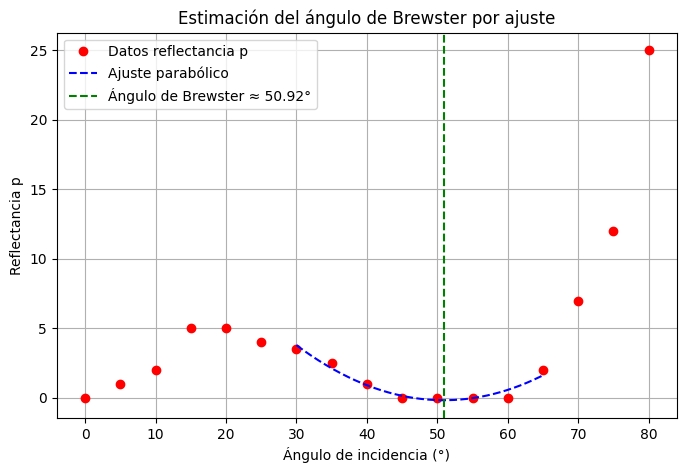

Ángulo de Brewster estimado: θ_B ≈ 50.92°


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos experimentales
angulos = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
Rp = np.array([0, 1, 2, 5, 5, 4, 3.5, 2.5, 1, 0, 0, 0, 0, 2, 7, 12, 25])

# Filtro: zona donde Rp está cerca del mínimo (elegimos ángulos 30°–65°)
filtro = (angulos >= 30) & (angulos <= 65)
theta_filtrado = angulos[filtro]
Rp_filtrado = Rp[filtro]

# Definir parábola
def parabola(theta, a, b, c):
    return a * theta**2 + b * theta + c

# Ajuste de curva
params, _ = curve_fit(parabola, theta_filtrado, Rp_filtrado)
a, b, c = params

# Calcular mínimo de la parábola (ángulo de Brewster estimado)
theta_B = -b / (2 * a)

# Graficar
theta_fit = np.linspace(30, 65, 300)
Rp_fit = parabola(theta_fit, a, b, c)

plt.figure(figsize=(8,5))
plt.plot(angulos, Rp, 'ro', label='Datos reflectancia p')
plt.plot(theta_fit, Rp_fit, 'b--', label='Ajuste parabólico')
plt.axvline(theta_B, color='green', linestyle='--', label=f'Ángulo de Brewster ≈ {theta_B:.2f}°')
plt.xlabel('Ángulo de incidencia (°)')
plt.ylabel('Reflectancia p')
plt.title('Estimación del ángulo de Brewster por ajuste')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar resultado
print(f'Ángulo de Brewster estimado: θ_B ≈ {theta_B:.2f}°')


Los valores de reflectancia p muestran que entre 45° y 60°, la señal es muy baja marca completamente cero, pero no exactamente cero ya que hay un error experimental debido a la precisión del sensor utilizado. Para evitar depender de un solo punto, usamos ajuste de curva para encontrar el mínimo.
El mínimo de la parábola ocurre en:
$$θ_B= -\frac{b}{2a}$$
Con los datos experimentales se hallo el valor para el angulo de Brewster de:


$$\theta_B \approx 50.9^\circ \pm 2^\circ$$

El material  usado que fue el vidrio $$(n_2 \sim 1.5)$$
Usando la fórmula teórica:

$$\theta_B = \tan^{-1} \left( \frac{n_2}{n_1} \right) = \tan^{-1} \left( \frac{1.5}{1} \right) \approx 56.3^\circ$$
El valor experimental está cerca del esperado para vidrio, aunque hay una diferencia notable de ~5°.
El comportamiento observado en la reflectancia p concuerda con la predicción teórica, lo que valida la observación del fenómeno de Brewster. La diferencia puede atribuirse a factores experimentales como errores angulares, respuesta del sensor o condiciones ópticas del material.